In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [8]:
decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
#decoder = load_model('./save_models/ae/residual_decoder_v15.h5')

In [10]:
pred = pd.read_excel('./pred_sae_v1.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3
0,0.000358,-0.000212,0.021681,-0.000940
1,0.000336,-0.000239,0.036474,-0.000551
2,0.000480,-0.000224,0.060010,-0.000624
3,0.000374,-0.000235,0.045817,-0.000476
4,0.000331,-0.000243,0.021535,-0.000906
...,...,...,...,...
930,0.000417,-0.000236,0.041747,-0.000822
931,0.000408,-0.000238,0.039530,-0.000841
932,0.000409,-0.000216,0.033425,-0.000939
933,0.000418,-0.000222,0.021943,-0.001292


In [11]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[3.2323858e-04, 2.3437190e-04, 2.1733937e-04, ..., 8.3571678e-04,
        5.1270437e-04, 4.0893182e-03],
       [6.0587463e-05, 4.9231847e-05, 6.1343150e-04, ..., 1.4785863e-04,
        7.4837654e-04, 1.8638142e-03],
       [1.1493454e-03, 1.6116513e-03, 9.3933225e-01, ..., 1.1319197e-03,
        6.7685801e-03, 6.1842799e-03],
       ...,
       [3.9261853e-05, 3.0001671e-05, 1.0212461e-04, ..., 9.8751516e-05,
        2.8896439e-04, 1.4262117e-03],
       [2.9746600e-04, 2.1551561e-04, 2.0410854e-04, ..., 7.6331047e-04,
        4.9970794e-04, 3.9512669e-03],
       [2.0948539e-03, 3.4015677e-03, 1.0236454e-01, ..., 2.3848575e-03,
        4.4410159e-03, 3.7064003e-03]], dtype=float32)

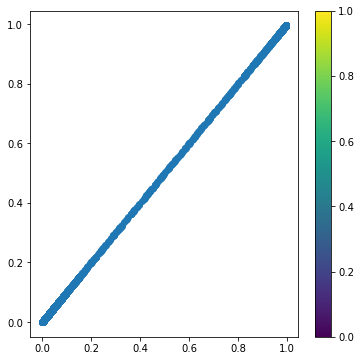

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [13]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [14]:
test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [16]:
#c_matrix.shape

In [17]:
#c_matrix

In [18]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.016042780748663103
precision :  0.05896805896805897
recall :  0.028898254063816978
f1 :  0.03878787878787879
------------------------
hamming_loss :  0.009711393231824305


In [19]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')